In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf # pip install tensorflow-macos
import os
tf.random.set_seed(1)
print(3)

3


# module 2 Intro to CNNs

layers:
1. input layer
2. process inputs
3. conv layer
4. pool layer
5. repeat 3 and 4 as desired
6. output layer

# Module 3 downloading food dataset

In [2]:
import zipfile


# os.chdir("data")

zip_path = "pizza_steak.zip"
if not os.path.isfile(zip_path):
    os.chdir("data")
# Unzip the downloaded file
zip_ref = zipfile.ZipFile(zip_path, "r")
zip_ref.extractall()
zip_ref.close()

# Module 4 becoming one with the data part 1

In [3]:
!ls pizza_steak/train/
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

pizza steak
There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


# Module 5 becoming one with the data part 2

In [4]:
# to visualize images, let's sort them

import pathlib
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (254, 512, 3)


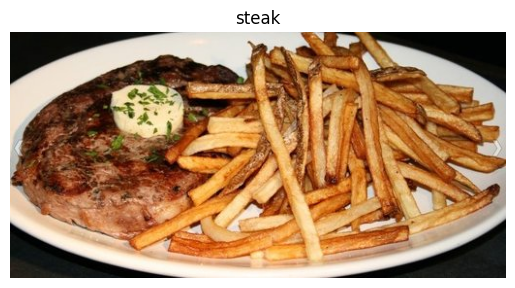

In [6]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

# module 6 becoming one with the data part 3

In [7]:
img.shape
# diff shapes for diff images

(254, 512, 3)

# module 7 building an ent-to-end CNN

We need
1. load images
2. preprocess images
3. build CNN
4. compile CNN
5. fit CNN

### preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# preprocess the data
train_datagen = ImageDataGenerator(1./255)
valid_datagen = ImageDataGenerator(1./255)

# setup paths to data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and import it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # common choice bc it has lots of info still
                                               class_mode="binary", seed=1)

valid_data = valid_datagen.flow_from_directory(test_dir, batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary", seed=1)

# designing the neural network
# same as Tiny VGG - https://poloclub.github.io/cnn-explainer/

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3), activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # same as first layer
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
# this is quite slow because my laptop doesn't have a GPU


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Epoch 1/5


/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
2023-05-04 10:16:22.179604: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 22s 453ms/step - loss: 3.1934 - accuracy: 0.5447 - val_loss: 0.6806 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5289 - accuracy: 0.7460 - val_loss: 0.7100 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 20s 431ms/step - loss: 0.3899 - accuracy: 0.8227 - val_loss: 0.7790 - val_accuracy: 0.6260
Epoch 4/5
47/47 [==============================] - 20s 435ms/step - loss: 0.2628 - accuracy: 0.8933 - val_loss: 0.9451 - val_accuracy: 0.6360
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.1821 - accuracy: 0.9447 - val_loss: 1.1267 - val_accuracy: 0.6440


### didn't take notes on using GPU in google colab or attempting the same problem without a CNN

# Breaking down our CNN part 1: becoming one with the data

Image shape: (341, 512, 3)
Image shape: (384, 512, 3)


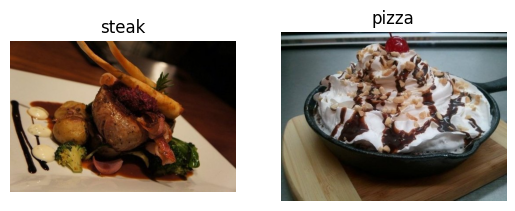

In [9]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Breaking down our CNN part 1: preprocessing


In [10]:
# turn our data into batched (number of images to view at a time, often 32)

# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
# turn it into batches. can also do things like flips etc to increase training data
train_data = train_datagen.flow_from_directory(directory=train_dir,  # directory containing images)
                                               target_size=(224, 224),  # size of images it should make (width, height)
                                               class_mode='binary',  # type of data you're working with
                                               batch_size=32)  # size of mini-batches

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# sample from training dataset
images, labels = train_data.next()
print(len(images), len(labels))  # 32, 32 because batch_size=32

# how many batches?
print(len(train_data))
# makes sense becuase that's ciel(1500/32)
import math
print(math.ceil(1500/32))

32 32
47
47


In [13]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.03921569, 0.03137255, 0.08627451],
          [0.0509804 , 0.03529412, 0.09411766],
          [0.05882353, 0.04313726, 0.10196079],
          ...,
          [0.23529413, 0.14117648, 0.10196079],
          [0.21960786, 0.1254902 , 0.08627451],
          [0.22352943, 0.12941177, 0.09019608]],
 
         [[0.03529412, 0.00784314, 0.07843138],
          [0.03921569, 0.00392157, 0.07058824],
          [0.05490196, 0.01176471, 0.07843138],
          ...,
          [0.2627451 , 0.16470589, 0.13725491],
          [0.2509804 , 0.15294118, 0.1254902 ],
          [0.25490198, 0.15686275, 0.12941177]],
 
         [[0.07450981, 0.02352941, 0.10196079],
          [0.06666667, 0.01568628, 0.09411766],
          [0.07450981, 0.01568628, 0.09019608],
          ...,
          [0.28627452, 0.18823531, 0.17254902],
          [0.27450982, 0.1764706 , 0.16078432],
          [0.28235295, 0.18431373, 0.16862746]],
 
         ...,
 
         [[0.5529412 , 0.40784317, 0.33333334],
          [0.55686

# breaking down our CNN part 4: building a baseline CNN

In [14]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # num of sliding inputs
                           kernel_size=3,  # dimensions of filters (this gives 3x3 pixels)
                           strides=(1, 1), # size of step window takes across input
                           padding="valid", # same => output shape = input shape, valid => output shape compressed
                           activation="relu",
                           input_shape=(224, 224, 3)),  # specify input shape
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification so sigmoid
])

# breaking down our CNN part 5: inside Conv2D layers

- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
- filters - these are the number of "feature extractors" that will be moving over our images.
- kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

# breaking down our CNN part 6: compiling & fitting our baseline CNN

In [15]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

In [16]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [17]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 532ms/step - loss: 0.6678 - accuracy: 0.6127 - val_loss: 0.5073 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 25s 533ms/step - loss: 0.4246 - accuracy: 0.8080 - val_loss: 0.3959 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.2701 - accuracy: 0.8960 - val_loss: 0.4118 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.1383 - accuracy: 0.9633 - val_loss: 0.4109 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.0432 - accuracy: 0.9940 - val_loss: 0.4443 - val_accuracy: 0.8060


# breaking our CNN model down part 7: evaluating our CNN's training curves

<Axes: >

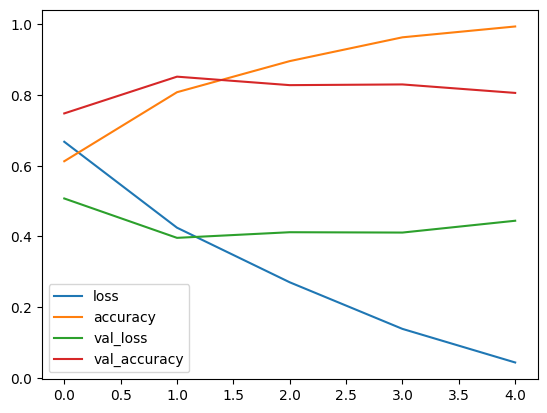

In [18]:
# training curves
pd.DataFrame(history_4.history).plot()

In [19]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

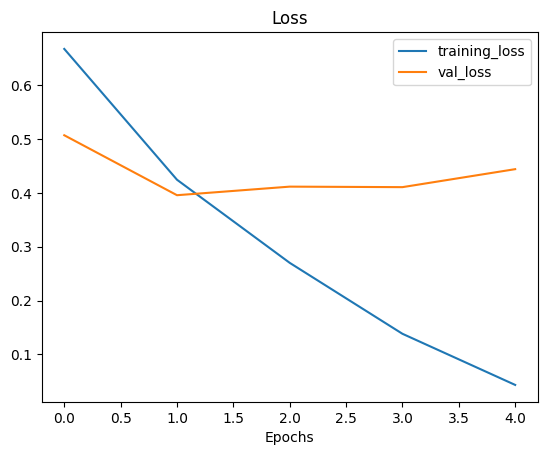

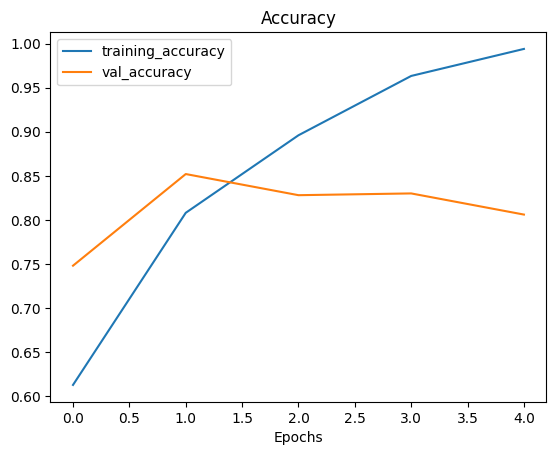

In [20]:
plot_loss_curves(history_4)


Note: validation loss staying around 0.5, which means the model is probably overfitting

# breaking down our CNN part 8: decreasing overfitting with MaxPooling

Steps to fitting model:
1. get a baseline
2. beat the baseline by overfitting a larger model
3. reduce overfitting

ways to increase overfitting:
- increase number of conv layers
- increase number of conv fliters
- add another dense layer to the output of flattened layer

reduce overfitting (also called regularization):
- add data augmentation
- add regulaization (like MaxPool2D)
- add more data

What does MaxPooling do?
- decreases size of image. takes most important value of pool_size x pool_size square

In [21]:
# make a new model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6429 - accuracy: 0.6213 - val_loss: 0.5102 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4846 - accuracy: 0.7840 - val_loss: 0.4315 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.4174 - accuracy: 0.8213 - val_loss: 0.3670 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3870 - accuracy: 0.8287 - val_loss: 0.3504 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3546 - accuracy: 0.8480 - val_loss: 0.4515 - val_accuracy: 0.7840


We got better accuracy and less overfitting than model_4 which didn't have MaxPool2D
- also note that output shape decreases at each maxpooling layer
- note that this has fewer parameters than model_4

In [23]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

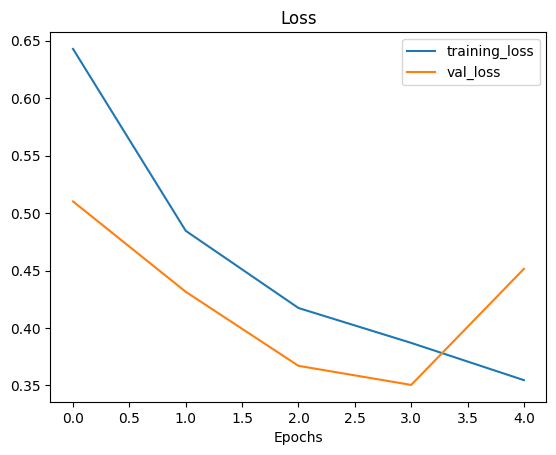

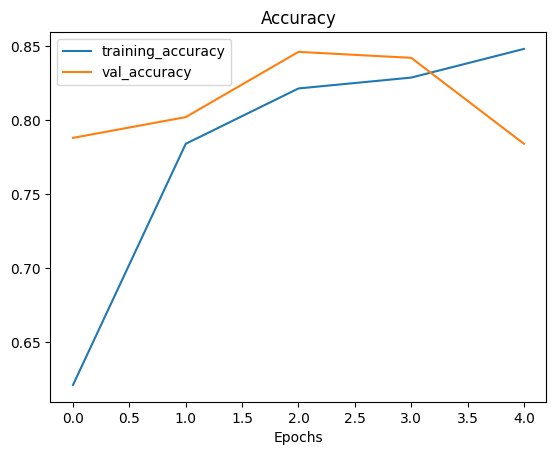

In [24]:
plot_loss_curves(history=history_5)

the more alligned the loss curves, the better because that means the model performs the same on the training and validation sets

# breaking down our CNN model part 9: reducing overfitting with data augmentation

In [36]:
# ImageDataGenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,  # how much to rotate
                                             shear_range=0.2,  # how much to shear
                                             zoom_range=0.2,  # how much to zoom
                                             height_shift_range=0.3,  # how much to horizontal shift
                                             width_shift_range=0.2,  # how much to vertical shift
                                             horizontal_flip=True)
# ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# ImageDataGenerator without augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

### What is data augmentation?
Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.



# breaking down our CNN model part 10: visualizing augmented data

In [34]:
# import data from training directory
print("augmented training data")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)  # shuffle only false for demonstration

print("non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("non-augmented tet data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32, # this is the default
                                             class_mode="binary")

augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented tet data
Found 500 images belonging to 2 classes.


- data augmentation usually only used on training data

image number 2


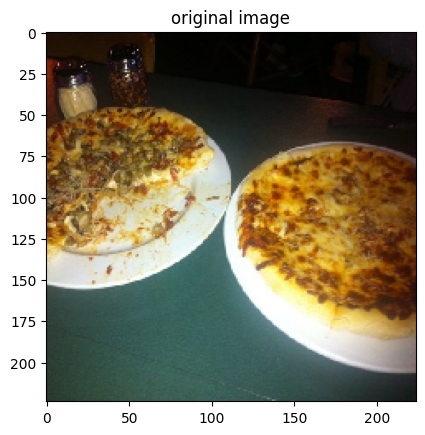

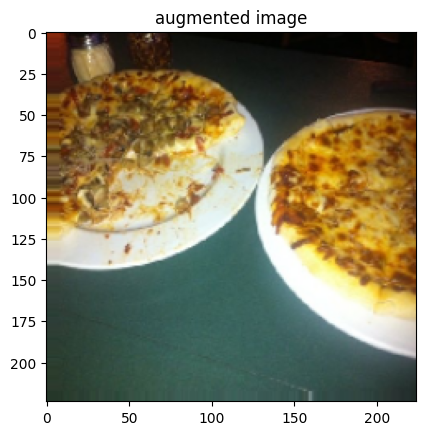

In [27]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_datagen_augmented.next()

chosen_image = random.randint(0, 32)
print(f"image number {chosen_image}")
plt.imshow(images[chosen_image])
plt.title("original image")
plt.figure()
plt.imshow(augmented_images[chosen_image])
plt.title("augmented image")
plt.show()


# breaking down our CNN model part 11: training a model on augmented data:

In [28]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [29]:
history_6 = model_6.fit(train_data, # fitting model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.8325 - accuracy: 0.5220 - val_loss: 0.7204 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.7411 - accuracy: 0.5067 - val_loss: 0.6923 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6916 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6912 - accuracy: 0.5720 - val_loss: 0.6845 - val_accuracy: 0.5600
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6792 - accuracy: 0.5687 - val_loss: 0.6339 - val_accuracy: 0.6380


# Breaking our CNN model down part 12: Discovering the power of shuffling data

In [37]:
# import shuffled augmented data
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               class_mode="binary",
                                                                               batch_size=32,
                                                                               shuffle=True)



Found 1500 images belonging to 2 classes.


In [38]:
# create model same as before but try again
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [39]:
history_7 = model_7.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 316ms/step - loss: 0.6523 - accuracy: 0.6213 - val_loss: 0.5183 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 14s 294ms/step - loss: 0.5615 - accuracy: 0.7093 - val_loss: 0.4060 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 14s 292ms/step - loss: 0.5145 - accuracy: 0.7573 - val_loss: 0.4564 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4869 - accuracy: 0.7693 - val_loss: 0.3352 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.4632 - accuracy: 0.7800 - val_loss: 0.3179 - val_accuracy: 0.8640


# Breaking our CNN model down part 13: Exploring options to improve our model
repeat modifications until satisfied. main ways for Conv
1. add more layers
2. add more hidden units (filters for Conv2D)
3. more data
4. fit for longer
5. transfer learning (will learn later)

# Downloading a custom image to make predictions on: making a prediction on our own data

(-0.5, 3023.5, 4031.5, -0.5)

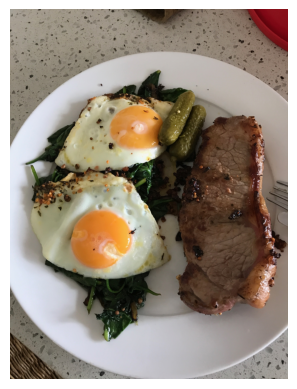

In [48]:
# example image:
steak = mpimg.imread("steak_example.jpeg")
plt.imshow(steak)
plt.axis(False)

In [49]:
steak.shape

(4032, 3024, 3)

# Writing a helper function to load and preprocessing custom images

In [50]:
model_7.predict(steak)
# didn't work bc of shape issue and batch size issue

ValueError: in user code:

    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/NoahRipstein/PycharmProjects/Tensorflow tutorial att2/venv/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)


In [53]:
expanded_steak = tf.expand_dims(steak, axis=0) # now it's a tensor, but it's still the wrong shape
# when we train a NN, we want predictions on same dimensions as training data

In [54]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [55]:
steak = load_and_prep_image("steak_example.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [57]:
probability_steak = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 12ms/step


# Making a prediction on a custom image with our trained CNN

In [58]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 12ms/step


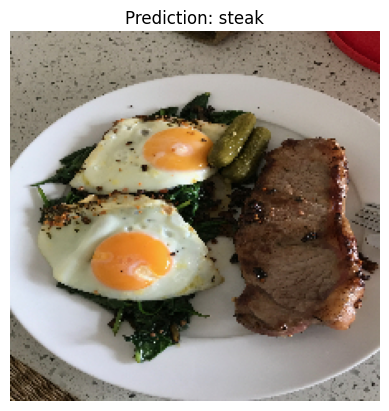

In [59]:
pred_and_plot(model_7, "steak_example.jpeg", class_names)